## Observations and Insights 

Observations about the data:
1. Ramicane and Capomulin had the smallest average tumor size
2. Ramicane and Capomulin also had the least variance
3. Ramicane and Capomulin had the greatest number of measurements taken and that could skew the data  

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset using pd.merge
combined_mouse_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice.

# COunt the number of unique mice
mice = combined_mouse_df["Mouse ID"].nunique()

# Display results
mice

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_df[combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_mouse_df.loc[combined_mouse_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Drop duplicated mouse id g989
clean_combined_df = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] != 'g989']

# Display cleaned data
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.

mice_count_clean = clean_combined_df["Mouse ID"].nunique()
mice_count_clean

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Us Groupby on Drug Regimen to get statistics on Tumor volume  
gb_mean = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
gb_median = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
gb_variance = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
gb_standev = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
gb_sem = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Put the identified statistics into a single summary dataframe
summary_statistics = pd.DataFrame({
                                    "Mean": gb_mean,
                                    "Median": gb_median,
                                    "Variance": gb_variance,
                                    "Standard Deviation": gb_standev,
                                    "SEM": gb_sem
                                  })

# Display summary
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = combined_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Display summary
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

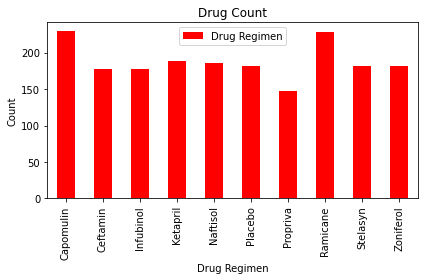

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Create a groupby dataframe on Drug Regimen then count the number of each
drug_regimen = clean_combined_df.groupby("Drug Regimen")
drug_regimen_count = pd.DataFrame(drug_regimen["Drug Regimen"].count())

# Create a bar graph with labels
drug_regimen_count.plot(kind="bar", facecolor="red")
plt.title('Drug Count')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<BarContainer object of 10 artists>

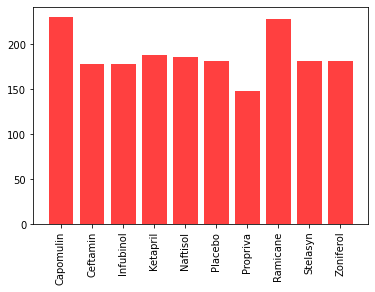

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Set x axis and tick locations where to write x labels
x_axis = np.arange(len(drug_regimen_count))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen_count.index.values, rotation='vertical')

# Create bar chart using plt.bar set color and alignment
plt.bar(x_axis, drug_regimen_count['Drug Regimen'], color='r', alpha=0.75, align="center")

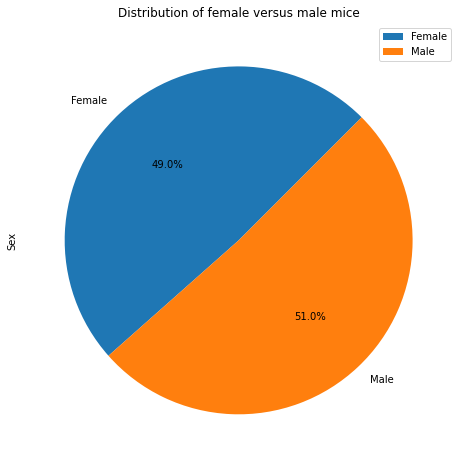

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a groupby dataframe on Drug Regimen then count the number of each
mouse_sex = clean_combined_df.groupby("Sex")
mouse_sex_count = pd.DataFrame(mouse_sex["Sex"].count())

# Create a pie chart with labels based upon the number of each sex
mouse_sex_count.plot(kind="pie", y='Sex', title=('Distribution of female versus male mice'), startangle=45, figsize=(8,8), autopct='%1.1f%%')
plt.show()


Text(0.5, 1.0, 'Distribution of female versus male mice')

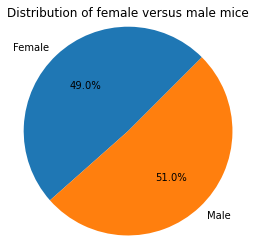

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a groupby dataframe on Sex then count the number of each
mouse_sex = clean_combined_df.groupby("Sex")
mouse_sex_count = mouse_sex["Sex"].count()
 
# Create a pie chart with labels based upon the number of each sex    
plt.pie(mouse_sex_count, labels=mouse_sex_count.index.values, radius=1.2, autopct="%1.1f%%", startangle=45)
plt.title('Distribution of female versus male mice')

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Groupby mouse id and get max timepoint for each
last_timepoint_df = clean_combined_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = last_timepoint_df.reset_index()

# Merge this groupby df with the original clean dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, clean_combined_df, on=['Mouse ID', 'Timepoint'])

# Display dataframe
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_volume = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # add subset 
    values = drug_volume['Tumor Volume (mm3)']
    tumor_vol_data.append(values)
      
    # Determine outliers using upper and lower bounds 
    quartiles = drug_volume.quantile([0.25,0.5,0.75])
    test = quartiles["Tumor Volume (mm3)"]
    lowerq = test[0.25]
    upperq = test[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Here is the data for {treatment}:")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}") 
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    #print(f"Values above  could be outliers.")
    print(f"--------------------------------------------------------")
# test = quartiles["Tumor Volume (mm3)"]


Here is the data for Capomulin:
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
Values below 20.70456164999999 and above 51.83201549 could be outliers.
--------------------------------------------------------
Here is the data for Ramicane:
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
Values below 17.912664470000003 and above 54.30681135 could be outliers.
--------------------------------------------------------
Here is the data for Infubinol:
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
--------------------------------------------------------
Here is the data for Ceftamin:
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
Values below 25

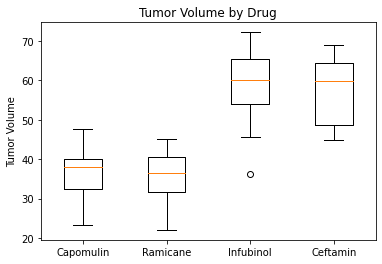

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
   
    
plt.boxplot(tumor_vol_data)
plt.title('Tumor Volume by Drug')
plt.ylabel('Tumor Volume')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

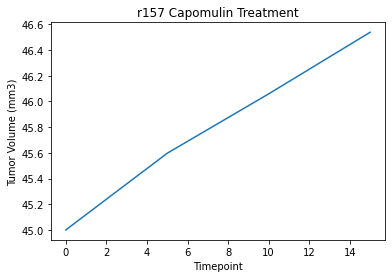

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Identify mice on Capomulin
capomulin_df = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']
#print(capomulin_df) to identify mouse id

#Identify data points of a mouse r157 treated with Capomulin
mickey_df = clean_combined_df.loc[clean_combined_df['Mouse ID'] == 'r157']

# Plot a line chart with the timepoints on the x-axis and the tumor volume on the y-axis
plt.plot(mickey_df['Timepoint'], mickey_df['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("r157 Capomulin Treatment")

# Display plot
plt.show()

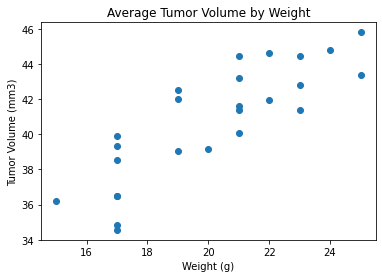

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Use Campomulin dataframe for above to do a grouby on 'Mouse Id' and get mean of 'tumor volume (m)''
# Do the same to get the mean of 'weight (g)' 
ave_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
ave_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot based on weight and tumor dataframes
plt.scatter(ave_weight, ave_tumor_vol)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


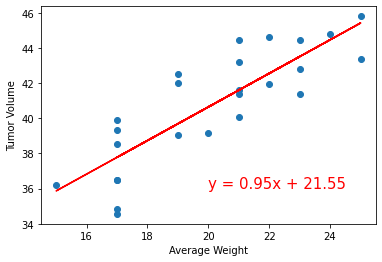

In [60]:
# Set x & y values and correlation
x_values = ave_weight
y_values = ave_tumor_vol
correlation = st.pearsonr(x_values, y_values)

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=15, color="red")

# Add labels
plt.xlabel('Average Weight')
plt.ylabel('Tumor Volume')

# Print out the correlation and r-squared
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

# Display plot
plt.show()